In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
#np.set_printoptions(threshold=1000, linewidth=75) #데이터 확인을 위해 생략 제거 과정 거쳤음

In [30]:
diabetes=load_diabetes()
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [23]:
df=pd.DataFrame(diabetes.data,columns=[diabetes.feature_names])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [44]:
X=df[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']].values
y=diabetes.target
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=777) 

In [160]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [187]:
W = np.random.rand(10)
b = np.random.rand()

In [188]:
W

array([0.37573242, 0.22236174, 0.73516826, 0.52430406, 0.23925888,
       0.69209351, 0.66942903, 0.24556516, 0.77853998, 0.85524896])

In [189]:
b

0.14518584782464472

In [164]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [134]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [135]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [200]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    db = 2 * (y_pred - y).mean()
    return dW, db
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ 0.09471584  0.07625155 -0.03273491 -0.02485184  0.14385681  0.06263861
  0.0434712   0.06169215  0.03045681 -0.02488045]
db: -5.177002178089816


In [195]:
LEARNING_RATE = 0.1
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3293.7485
Iteration 20 : Loss 3032.6443
Iteration 30 : Loss 3029.6257
Iteration 40 : Loss 3029.5825
Iteration 50 : Loss 3029.5737
Iteration 60 : Loss 3029.5653
Iteration 70 : Loss 3029.5569
Iteration 80 : Loss 3029.5486
Iteration 90 : Loss 3029.5403
Iteration 100 : Loss 3029.5321
Iteration 110 : Loss 3029.5238
Iteration 120 : Loss 3029.5156
Iteration 130 : Loss 3029.5075
Iteration 140 : Loss 3029.4994
Iteration 150 : Loss 3029.4913
Iteration 160 : Loss 3029.4832
Iteration 170 : Loss 3029.4752
Iteration 180 : Loss 3029.4671
Iteration 190 : Loss 3029.4592
Iteration 200 : Loss 3029.4512
Iteration 210 : Loss 3029.4433
Iteration 220 : Loss 3029.4354
Iteration 230 : Loss 3029.4276
Iteration 240 : Loss 3029.4198
Iteration 250 : Loss 3029.4120
Iteration 260 : Loss 3029.4042
Iteration 270 : Loss 3029.3965
Iteration 280 : Loss 3029.3888
Iteration 290 : Loss 3029.3811
Iteration 300 : Loss 3029.3735
Iteration 310 : Loss 3029.3659
Iteration 320 : Loss 3029.3583
Iteration 330 : L

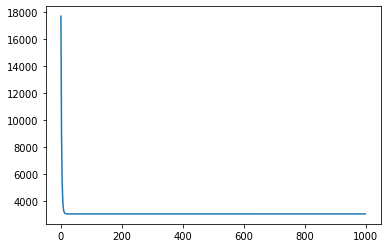

In [196]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [197]:
W

array([  14.34098609, -212.57193759,  525.39896836,  306.55903079,
        -51.13296953, -127.47080783, -164.61070755,  155.86915972,
        476.76835295,   51.81243558])

In [198]:
b

149.5449830738515

In [199]:
prediction = model(X_test, W, b) #X값에 X_test 대입
mse = loss(X_test, W, b, y_test)
mse

2352.389906594707

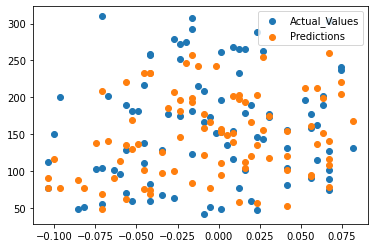

In [207]:
predictions = model(X_test, W, b)
plt.scatter(X_test[:, 0], y_test, label="Actual_Values")
plt.scatter(X_test[:, 0], predictions, label="Predictions")
plt.legend()
plt.show()

노드를 보고 따라한 것이긴 하지만, 실제로 있는 라이브러리를 쓴것이 아니라,   
코드를 직접 써보면서 모델이나, MSE가 어떤식으로 구성 되어 있는지 볼 수 있는 기회였다.   
예전에 OKR을 진행할 때, MSE, RMSE등을 손코딩 해봤냐는 질문이 있었는데, 그 때는 미쳐 해보지 못했었다.   
하지만 이번 기회에 이렇게 원리를 알고 직접 코딩을 할 수 있어서 아주 괜찮은 기회였던 것 같다.   
처음에 데이터를 저장할 때 조금 버거웠지만, 그래도 곧잘 되어서 큰 어려움 없이 할 수 있었던 것 같다.
MSE 값이 2352정도로 나왔다, 마지막 예측 값과 실제 값도 어느 정도 유사성을 띄고 있는 것 같다.